In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
module = fc.eightb.feynnet

In [3]:
module

/store/user/ekoenig/8BAnalysis/NTuples/2018/feynnet
   Background
   NMSSM_XYY_YToHH_8b
   Run2_UL

In [8]:
bkg = ObjIter([Tree(module.Run2_UL18.QCD_B_List, altfile='test_{base}')])


100%|██████████| 16/16 [00:17<00:00,  1.11s/it]


In [12]:
trigger

'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5'

In [13]:
def pfht_pt30(t):
    jet_pt = t.jet_pt 

    t.extend(
        pfht_pt30=ak.sum( jet_pt[jet_pt>30], axis=1 )
    )

bkg.apply(pfht_pt30)

[None]

100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


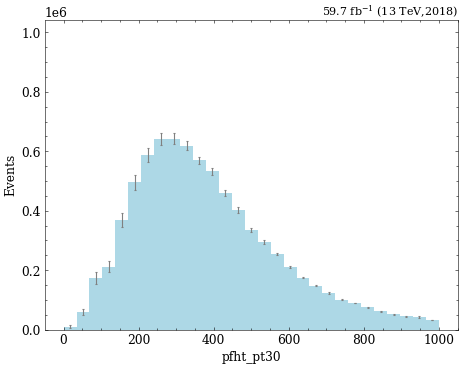

In [15]:
study.quick(
    bkg,
    varlist=['pfht_pt30'],
    binlist=[(0,1000,30)],
)

In [16]:
trigger

'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5'

In [18]:
def trigger_kinematics(t):
    pfht330_pt30 = t.pfht_pt30 > 330
    quadpf_jet = (t.jet_pt[:,0] > 75) & (t.jet_pt[:,1] > 60) & (t.jet_pt[:,2] > 45) & (t.jet_pt[:,3] > 40)

    t.extend(
        pfht330_pt30=pfht330_pt30,
        quadpf_jet=quadpf_jet,
        trigger_kin=pfht330_pt30 & quadpf_jet,
    )
bkg.apply(trigger_kinematics)

[None]

100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


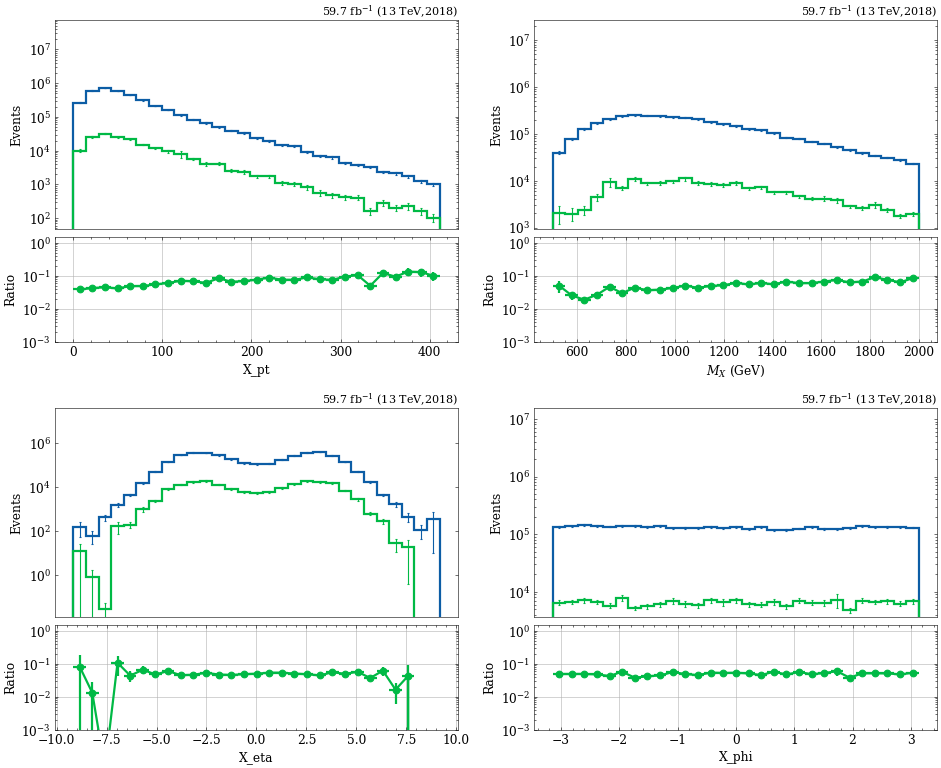

In [33]:
study.quick_region(
    bkg, bkg,
    h_color=None,
    masks=[lambda t : t.trigger_kin, lambda t : t[trigger]==1],
    varlist=['X_pt','X_m','X_eta','X_phi'],
    log=True,

    ratio=True, r_inv=True, r_log=True, r_ylim=(1e-3,1.5e0),
    r_size='50%',
)

In [45]:
bkg.trigger_kin.apply(lambda a : ak.sum(a) * (0.8/0.2) * 0.8), bkg.trigger_kin.apply(ak.mean), bkg[trigger].apply(ak.mean)

([695574.4], [0.8802279059219904], [0.08412028638071789])

100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


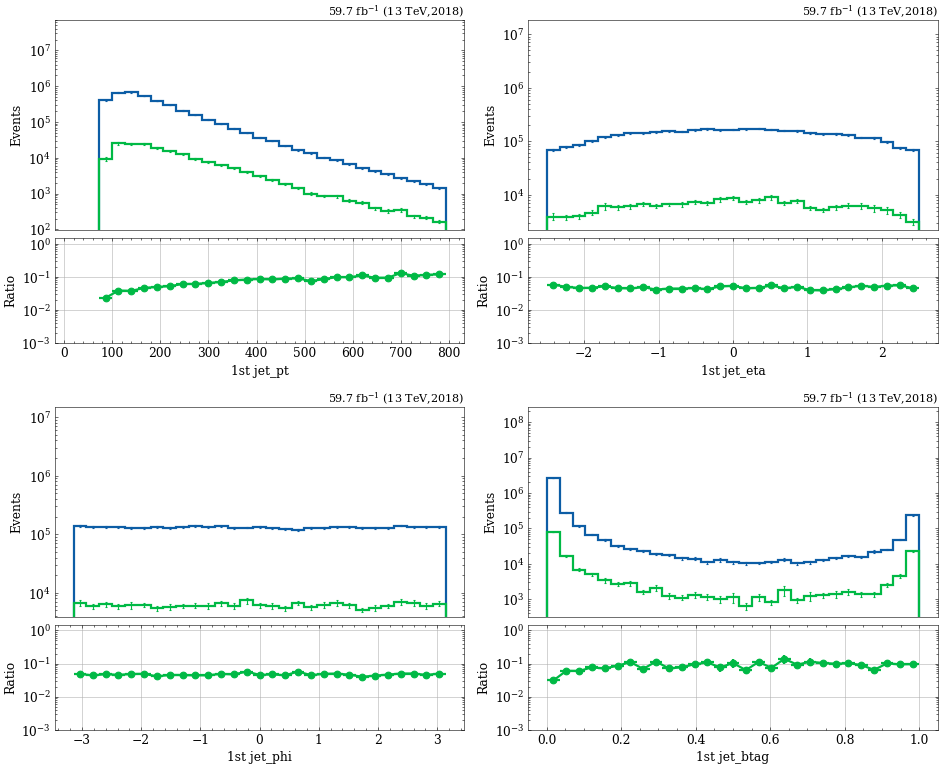

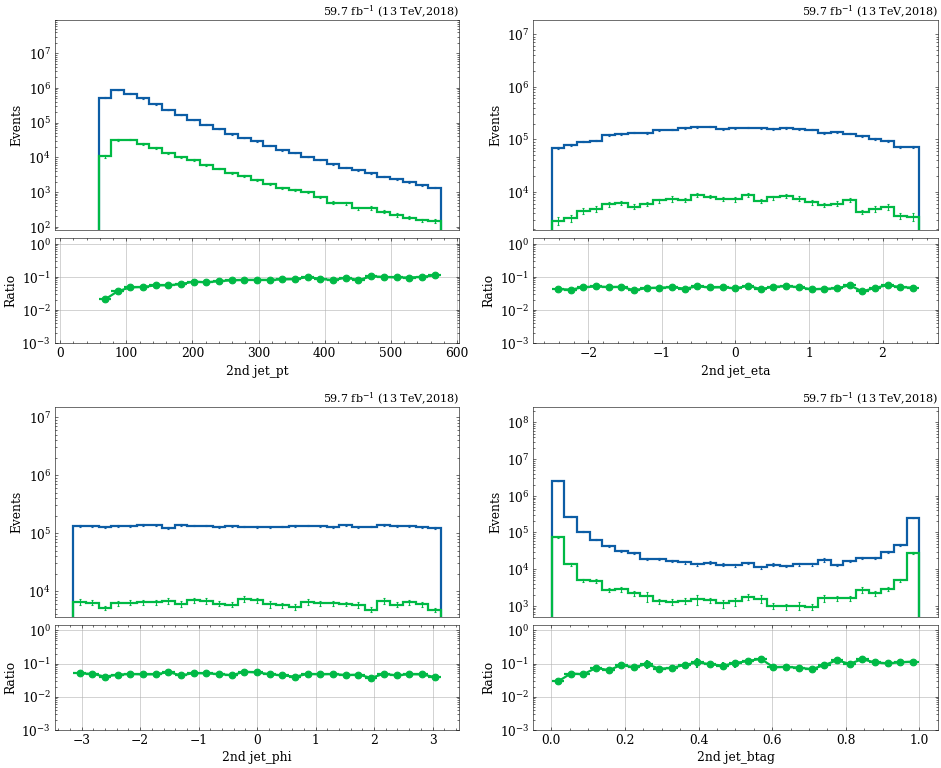

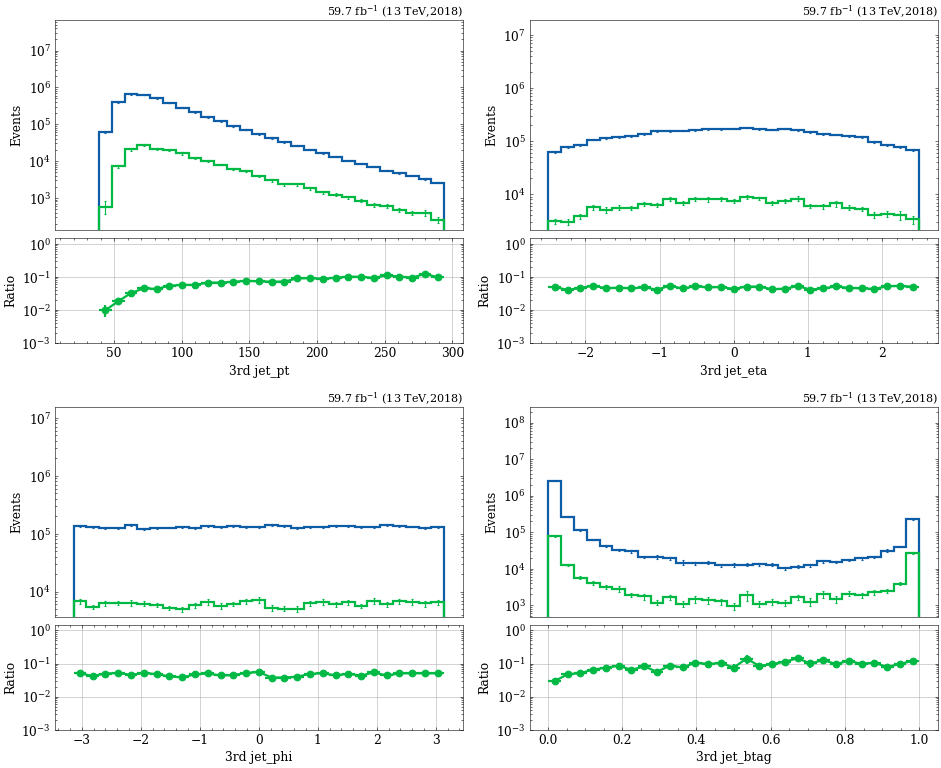

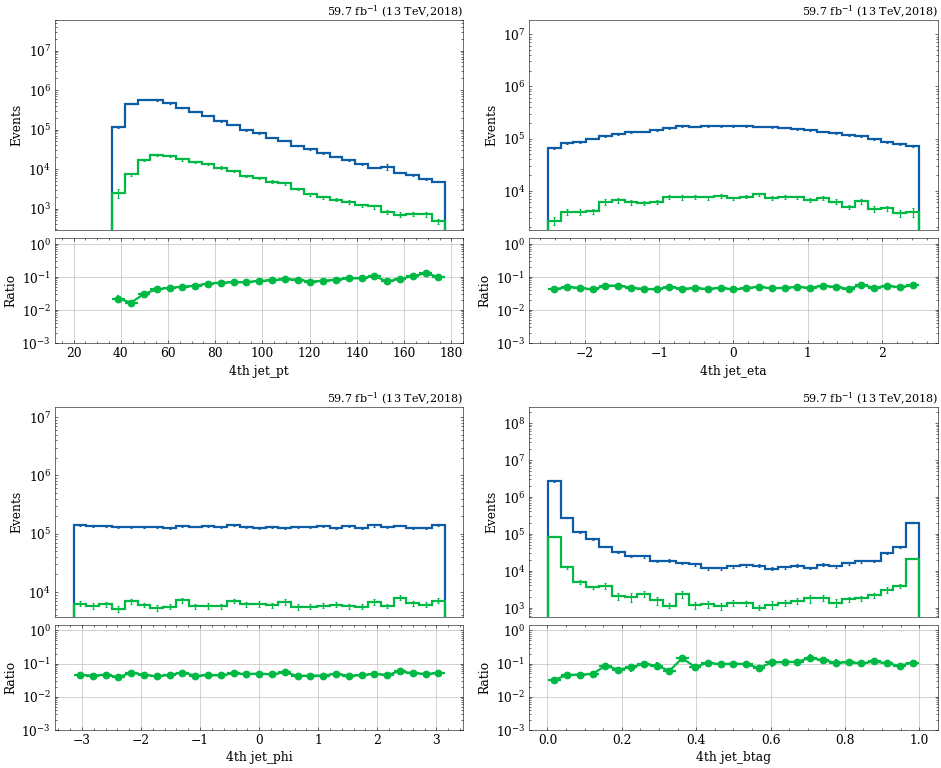

In [36]:
for i in range(4):
    study.quick_region(
        bkg, bkg,
        h_color=None,
        masks=[lambda t : t.trigger_kin, lambda t : t.trigger_kin & t[trigger]==1],
        varlist=[f'jet_pt[:,{i}]',f'jet_eta[:,{i}]',f'jet_phi[:,{i}]',f'jet_btag[:,{i}]'],
        log=True,

        ratio=True, r_inv=True, r_log=True, r_ylim=(1e-3,1.5e0),
        r_size='50%',
    )